In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
x = np.linspace(-10,10,5000)
deltax = x[1]-x[0]

%matplotlib notebook

In [26]:
def norm(phi):
    norm = np.sum(np.square(np.abs(phi)))*deltax
    return phi/np.sqrt(norm)

def complex_plot(x,y):
    real = np.real(y)
    imag = np.imag(y)
    a,*_ = plt.plot(x,real, ':', label='Re')
    b,*_ = plt.plot(x,imag, ':', label='Im')
    plt.xlim(-7,7)
    p,*_ = plt.plot(x,np.abs(y),label='$\sqrt{P}$')
    return a,b,p  

def wave_packet(pos=0,mom=0,sigma=0.2):
    return (2 * np.pi * np.square(sigma))**(-1/4) * np.exp(1j*mom*x)*np.exp(-np.square((x-pos)/(2*sigma)),dtype=complex)

                
def d_dxdx(phi,x=x):
    dphi_dxdx = -2*phi
    dphi_dxdx[:-1] += phi[1:]
    dphi_dxdx[1:] += phi[:-1]
    return dphi_dxdx/(deltax)
                
def d_dt(phi,h=1,m=10,V=0):
    return 1j*h/2/m * d_dxdx(phi) - 1j*V*phi/h
                
def rk4(phi, dt, **kwargs):
    k1 = d_dt(phi, **kwargs)
    k2 = d_dt(phi+dt/2*k1, **kwargs)
    k3 = d_dt(phi+dt/2*k2, **kwargs)
    k4 = d_dt(phi+dt*k3, **kwargs)
    return phi + dt/6*(k1+2*k2+2*k3+k4)


def simulate(phi_sim, 
             V=0, 
             steps=100000, 
             dt=0.01, 
             condition=None, 
             save_every=1000):
    simulation_steps = np.zeros((int(steps/save_every), 5000), dtype = complex)
    l = 0
    for i in range(steps):
        phi_sim = rk4(phi_sim,dt,V=V)
        if condition:
            phi_sim = condition(phi_sim)
        phi_sim = norm(phi_sim)
        if i % save_every == 0:
            simulation_steps[l,:] = phi_sim
            l += 1
    return simulation_steps
              

def hat_init(minimum):
    plt.fill_between(x, (-1*(1-2*x**2)*1e-2*np.square(x) - 0.5*x**2 +0.6), minimum-5, color='orange',alpha=0.2) 
    #plt.fill_between(x, (-10*(20-6*x**2)*1e-2*np.square(x) - 0.9*x**2+0.6), minimum-5, color='orange',alpha=0.2)
    plt.xlim(-7,7)
    plt.ylim(-5,7) 
    
def animate(simulation_steps,init_func=None):
    fig = plt.figure()
    re,im,prob = complex_plot(x,simulation_steps[0])
    plt.xlim(-7,7)
    plt.ylim(-5,7)
    plt.xlabel('Position')
    plt.ylabel(r'$\psi$')
    plt.title('Tunnelling through a Mexican hat potential')
    plt.legend()
    if init_func:
        init_func()

    def animate(frame):
        prob.set_data((x, np.abs(simulation_steps[frame])))
        re.set_data((x, np.real(simulation_steps[frame])))
        im.set_data((x, np.imag(simulation_steps[frame])))
        return prob,re,im

    anim = FuncAnimation(fig, animate, frames=int(len(simulation_steps)), init_func = hat_init(minimum), interval=50)
    writer = PillowWriter(fps=30)
    anim.save("mexican_hat_tunnelling.gif", writer=writer)
    plt.show()

    return anim

In [87]:
# sim_free = simulate(wave_packet(mom=10),steps=20000,save_every=100)
# animate(sim_free)

# quadratic_potential = 1e-2*np.square(x)
# sim_quadratic_potential = simulate(wave_packet(mom=10),V=quadratic_potential,steps=20000,save_every=100)
# animate(sim_quadratic_potential) 

<IPython.core.display.Javascript object>


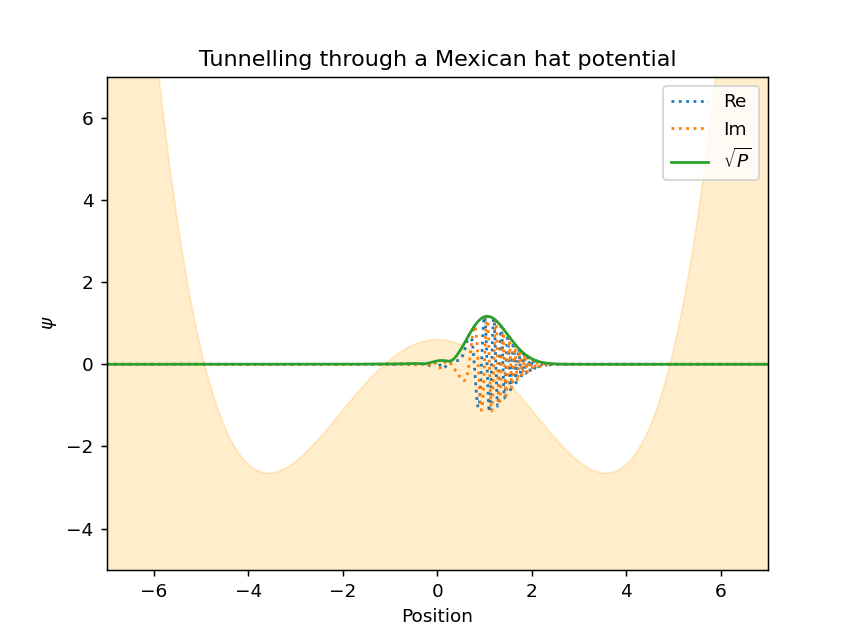

In [27]:
#hat_potential = (-10*(20-6*x**2)*1e-2*np.square(x) - 0.9*x**2+0.6)
hat_potential = (-1*(1-2*x**2)*1e-2*np.square(x) - 0.5*x**2 +0.6)
minimum = hat_potential.min()
sim_hat_potential = simulate(wave_packet(mom=120, pos=3.5),V=hat_potential,steps=80000,save_every=100)
animate(sim_hat_potential)